This datset contains 10 diffrent classes of object with 32x32 size rgb image
Total no of training dataset =50k and testing datset is = 10k

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

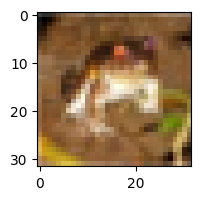

In [ ]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])

In [ ]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)   #converts the 2d arrray into 1d

In [ ]:
#y_train[:5]
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

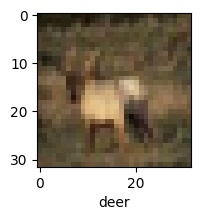

In [ ]:
plot_sample(X_train,y_train,3)

In [ ]:
X_train=X_train/255
X_test=X_test/255  #Normalization

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This is a key step in Keras to prepare your CNN model for training. It tells Keras how to update the weights, what loss function to minimize, and what metrics to track during training.

In [ ]:
history=model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.3755 - loss: 1.7038
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5892 - loss: 1.1524
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6525 - loss: 0.9959
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6820 - loss: 0.9123
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7076 - loss: 0.8425
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7328 - loss: 0.7644
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.7524 - loss: 0.7083
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7743 - loss: 0.6504
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7890 - loss: 0.6069
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 22ms/step - accuracy: 0.8013 - loss: 0.5646


In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6930 - loss: 0.9589


[0.9559323191642761, 0.6949999928474426]

In [ ]:
y_pred=model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
import numpy as np
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:10]

[np.int64(5),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(4),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(1)]

In [ ]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.83      0.53      1000
           1       0.50      0.81      0.62      1000
           2       0.61      0.28      0.38      1000
           3       0.41      0.29      0.34      1000
           4       0.65      0.13      0.21      1000
           5       0.48      0.51      0.49      1000
           6       0.71      0.49      0.58      1000
           7       0.52      0.70      0.60      1000
           8       0.63      0.38      0.47      1000
           9       0.56      0.67      0.61      1000

    accuracy                           0.51     10000
   macro avg       0.55      0.51      0.48     10000
weighted avg       0.55      0.51      0.48     10000

